<a href="https://colab.research.google.com/github/Manjunayak007-Ai/Manjunayak007-Ai/blob/main/Taining_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

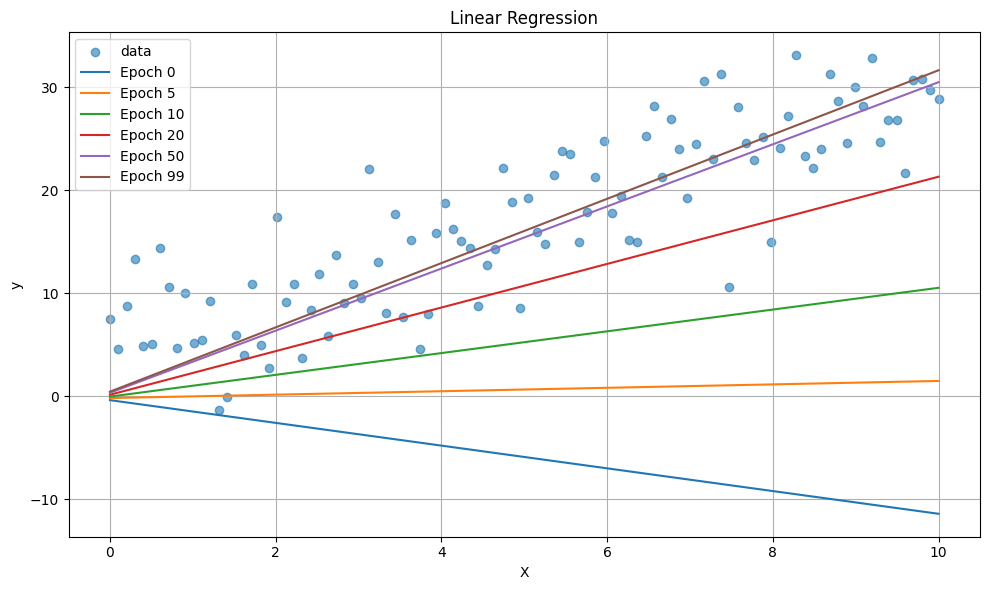

In [ ]:
# Linear Regression

import numpy as np

import matplotlib.pyplot as plt


np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples)
true_slope = 2.5
true_intercept = 5.0
noise = np.random.normal(0, 5.0, n_samples)
y = true_slope * X + true_intercept +noise

# Add bias term to X
X_design = np.vstack([X, np.ones_like(X)]).T

# Initialize weights (slope and intercept)
weights = np.random.randn(2)
learning_rate = 0.001
epochs = 100
line_params = []

# Gradient Descent
for epoch in range(epochs):
    y_pred = X_design @ weights
    error = y_pred - y
    gradients = 2 * X_design.T @ error / n_samples
    weights -= learning_rate * gradients
    line_params.append(weights.copy())

# Plotting
x_vals = np.linspace(0, 10, 100)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="data", alpha=0.6)

# Plot regression lines at selected epochs
for epoch in [0, 5, 10, 20, 50, 99]:
    slope, intercept = line_params[epoch]
    plt.plot(x_vals, slope * x_vals + intercept, label=f"Epoch {epoch}")

plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# read a csv file and convert to a data frame

import pandas as pd
df = pd.read_csv('advertising.csv')

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


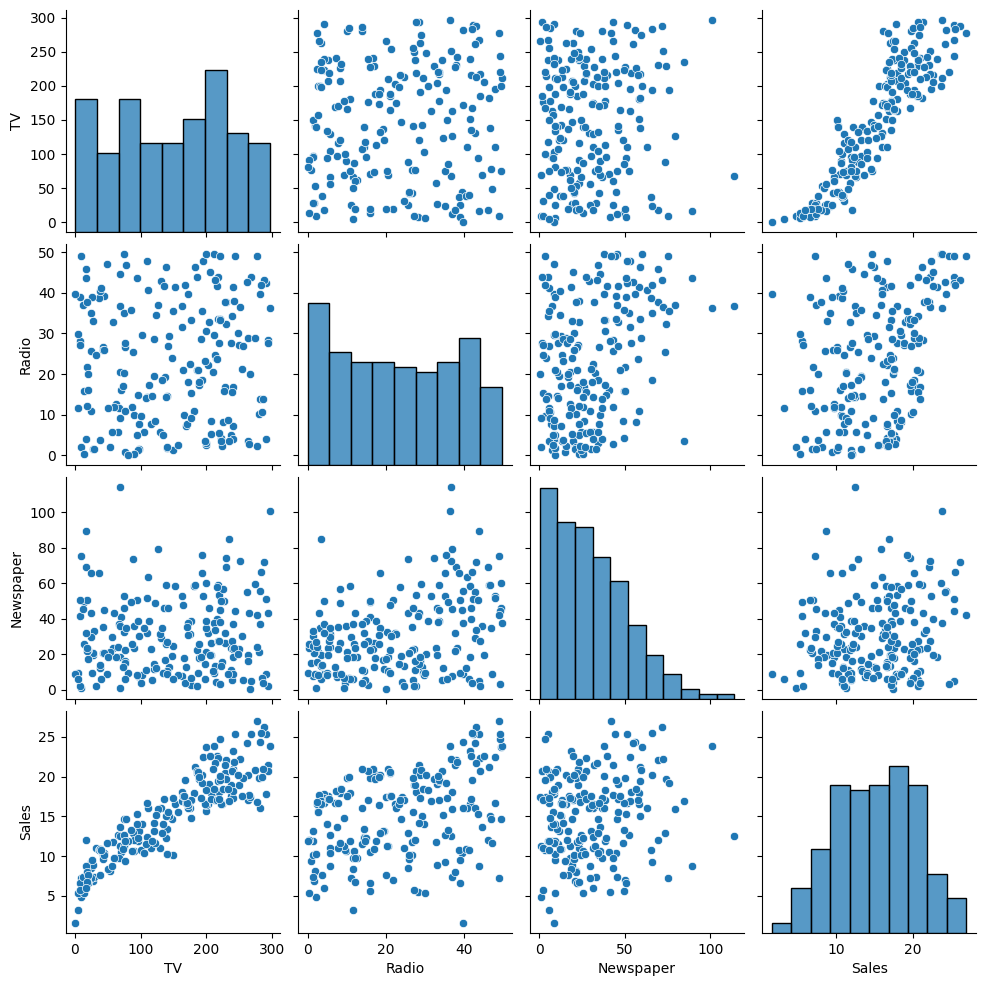

In [ ]:
# obtain the pair plots for all the columns in the dataframe

import seaborn as sns
sns.pairplot(df)

,0
TV,"Axes(0.125,0.11;0.168478x0.77)"
Radio,"Axes(0.327174,0.11;0.168478x0.77)"
Newspaper,"Axes(0.529348,0.11;0.168478x0.77)"
Sales,"Axes(0.731522,0.11;0.168478x0.77)"


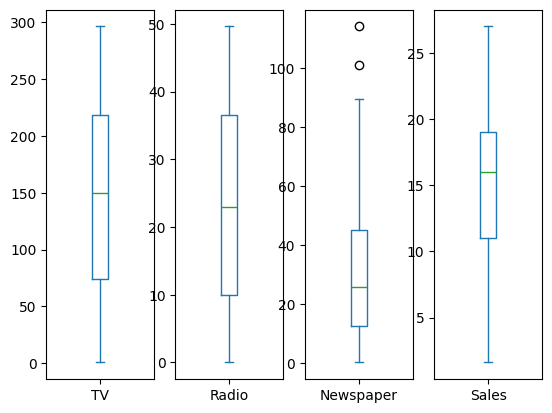

In [ ]:
# Plot box plot for the columns of the dataframe

df.plot(kind='box', subplots=True, layout=(1, 4), sharex=False, sharey=False)

<Axes: >

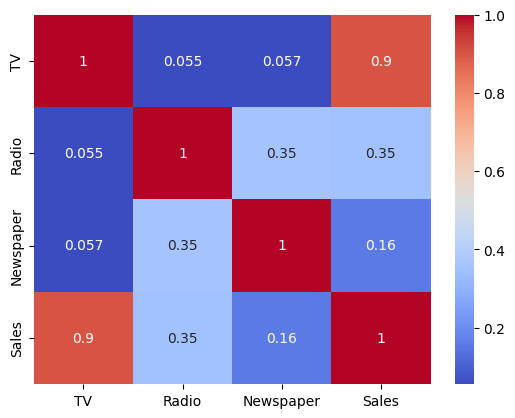

In [ ]:
# get the co-relation matrix between the columns of the data frame.
# use the gradients to visually explain the magnitude of co-relation

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
# use sklearn linear regression model
# first 3 columns of the df is the features
# last column is the actual target

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# evaluate the MSE loss and print it

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.9077569102710896


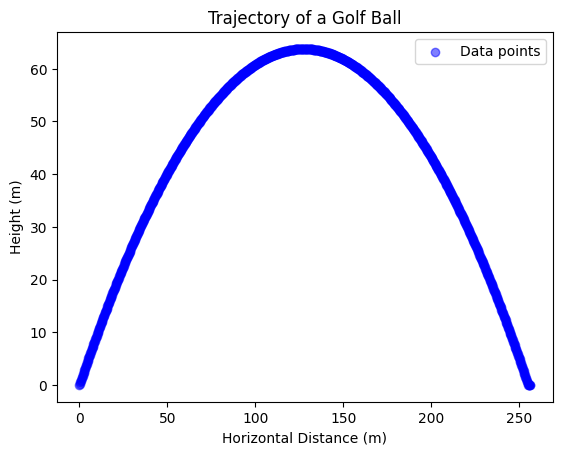

Mean Squared Error (Linear Regression): 365.2021121407612


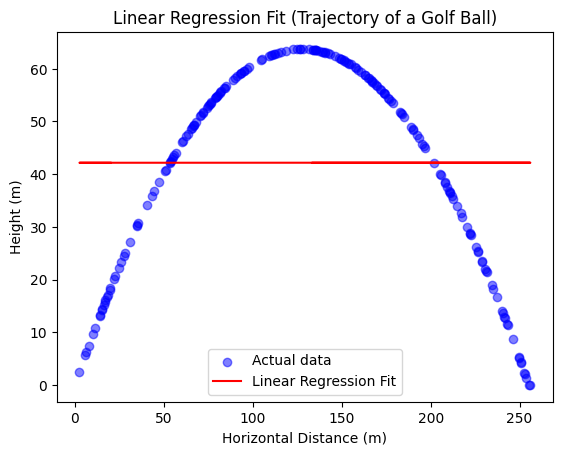

Fitted Parameters for Quadratic Model: a = -0.00391863576149221, b = 0.999721816833411, c = 0.008761221790803854
Mean Squared Error (Quadratic Model): 0.004683864843631869


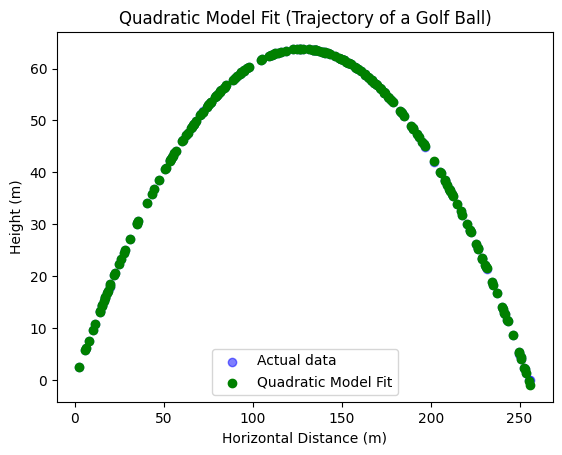

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Generate synthetic data for the trajectory of a golf ball
np.random.seed(42)
g = 9.8  # Acceleration due to gravity (m/s^2)
v0 = 50  # Initial velocity (m/s)
theta = 45  # Launch angle in degrees
theta_rad = np.radians(theta)  # Convert angle to radians

# Time values from 0 to 10 seconds, 1000 data points
time = np.linspace(0, 7.25, 1000)

# Calculate horizontal (x) and vertical (y) position
x = v0 * np.cos(theta_rad) * time
y = v0 * np.sin(theta_rad) * time - 0.5 * g * time**2
y = np.maximum(y, 0)  # Ensure height is non-negative

# Create a DataFrame
data = pd.DataFrame({'Time': time, 'X': x, 'Y': y})

# Scatter plot of the data
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.5, label='Data points')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Trajectory of a Golf Ball')
plt.legend()
plt.show()

# Prepare data for regression
X = data[['X']]
y = data['Y']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Calculate Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

# Plot Linear Regression results
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression Fit')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Linear Regression Fit (Trajectory of a Golf Ball)')
plt.legend()
plt.show()

# Define the quadratic function ax^2 + bx + c
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic model to the training data
params, covariance = curve_fit(quadratic_model, X_train['X'], y_train)

# Extract the parameters
a, b, c = params
print(f"Fitted Parameters for Quadratic Model: a = {a}, b = {b}, c = {c}")

# Predict using the fitted quadratic model
y_pred_quad = quadratic_model(X_test['X'], a, b, c)

# Calculate Mean Squared Error for the quadratic model
mse_quad = mean_squared_error(y_test, y_pred_quad)
print(f'Mean Squared Error (Quadratic Model): {mse_quad}')

# Plot Quadratic Model results
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual data')
plt.scatter(X_test, y_pred_quad, color='green', label='Quadratic Model Fit')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Height (m)')
plt.title('Quadratic Model Fit (Trajectory of a Golf Ball)')
plt.legend()
plt.show()


Mean Squared Error (Unregularized Polynomial Regression - Degree 25): 585.8658
Mean Squared Error (Ridge Regularized Polynomial Regression - Degree 25): 237.5961
Mean Squared Error (Lasso Regularized Polynomial Regression - Degree 25): 221.1915


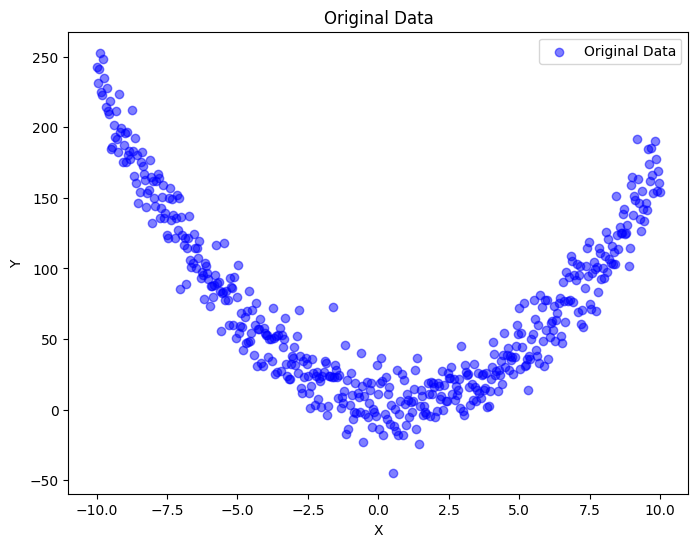

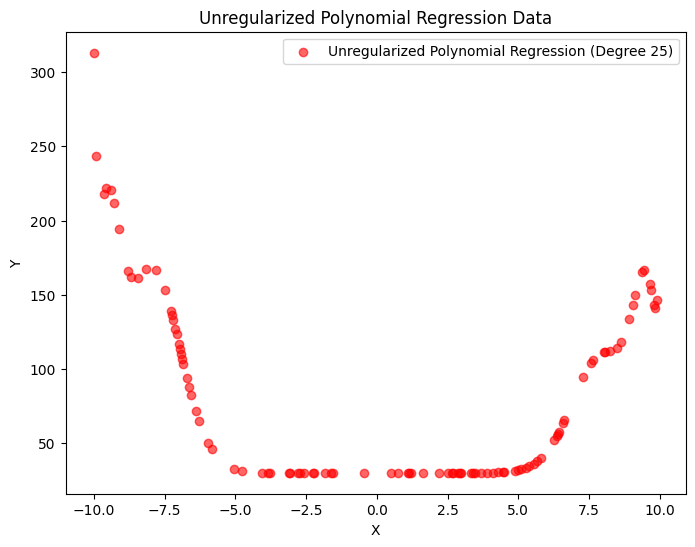

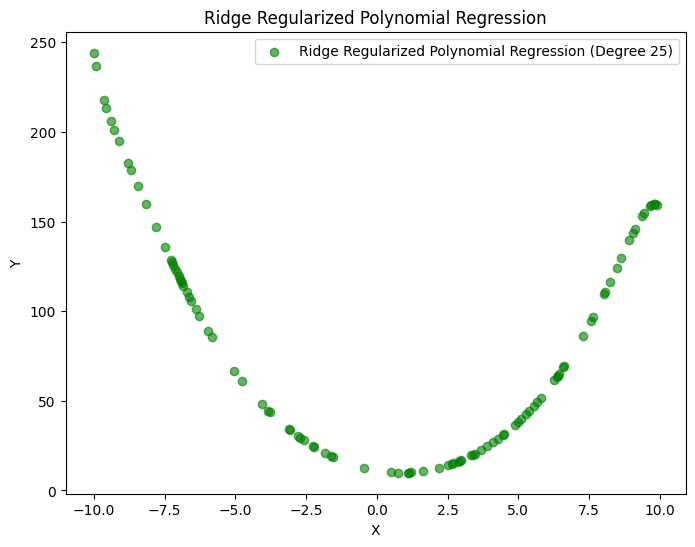

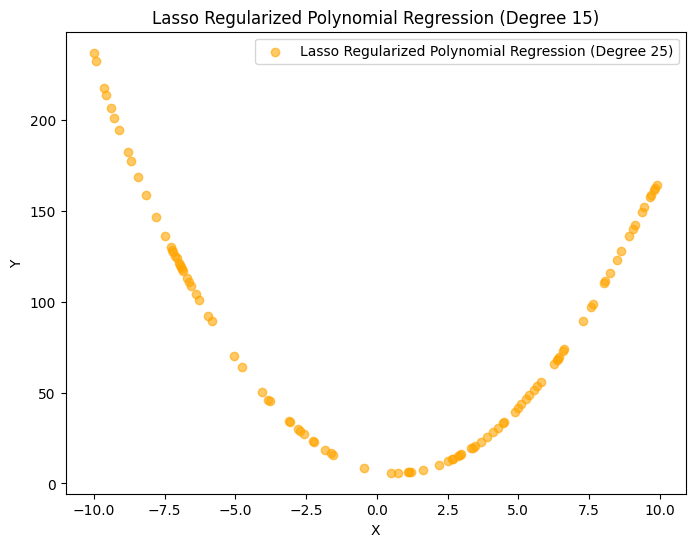

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate Non-Linear Synthetic Data (2nd Degree Polynomial Data)
np.random.seed(42)
X = np.linspace(-10, 10, 500)  # 100 data points between -5 and 5
Y = 2 * X**2 - 3 * X + 5 + np.random.normal(0, 15, 500)  # 2nd degree polynomial relationship with high noise

# Reshape X for model compatibility
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Create a Polynomial Regression Model of Degree 25 Without Regularization (Overfitting Scenario)
poly_degree = 25
poly_reg_model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
poly_reg_model.fit(X_train, y_train)
y_pred_poly = poly_reg_model.predict(X_test)

# Calculate MSE for Unregularized Polynomial Regression Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Unregularized Polynomial Regression - Degree 25): {mse_poly:.4f}')

# Step 3: Create a Polynomial Regression Model of Degree 25 With Ridge (L2) Regularization
ridge_reg_model = make_pipeline(PolynomialFeatures(degree=poly_degree),StandardScaler(), Ridge(alpha=10.0))
ridge_reg_model.fit(X_train, y_train)
y_pred_ridge = ridge_reg_model.predict(X_test)

# Calculate MSE for Ridge Regularized Polynomial Regression Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge Regularized Polynomial Regression - Degree 25): {mse_ridge:.4f}')

# Step 4: Create a Polynomial Regression Model of Degree 25 With Lasso (L1) Regularization
lasso_reg_model = make_pipeline(PolynomialFeatures(degree=poly_degree),StandardScaler(), Lasso(alpha=0.5, max_iter=10000))
lasso_reg_model.fit(X_train, y_train)
y_pred_lasso = lasso_reg_model.predict(X_test)

# Calculate MSE for Lasso Regularized Polynomial Regression Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso Regularized Polynomial Regression - Degree 25): {mse_lasso:.4f}')

# Step 5: Plot the Results with Scatter Plots for Better Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data')
plt.legend()
plt.show()

# Scatter plot for unregularized polynomial regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_pred_poly, color='red', alpha=0.6, label='Unregularized Polynomial Regression (Degree 25)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unregularized Polynomial Regression Data')
plt.legend()
plt.show()

# Scatter plot for Ridge regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_pred_ridge, color='green', alpha=0.6, label='Ridge Regularized Polynomial Regression (Degree 25)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge Regularized Polynomial Regression')
plt.legend()
plt.show()

# Scatter plot for Lasso regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_pred_lasso, color='orange', alpha=0.6, label='Lasso Regularized Polynomial Regression (Degree 25)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lasso Regularized Polynomial Regression (Degree 15)')
plt.legend()
plt.show()


Original Points (x, y): [(-4, 10), (9, -7), (4, -3), (0, -8), (-3, 10), (10, -9), (-4, 1), (8, -5), (0, -9), (0, 10)]

Fitting Polynomial with 2 points:
Coefficients: [-1.30769231  4.76923077]


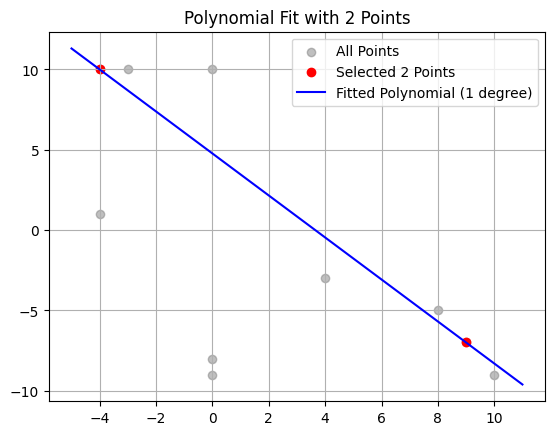


Fitting Polynomial with 3 points:
Coefficients: [ 0.06346154 -1.625       2.48461538]


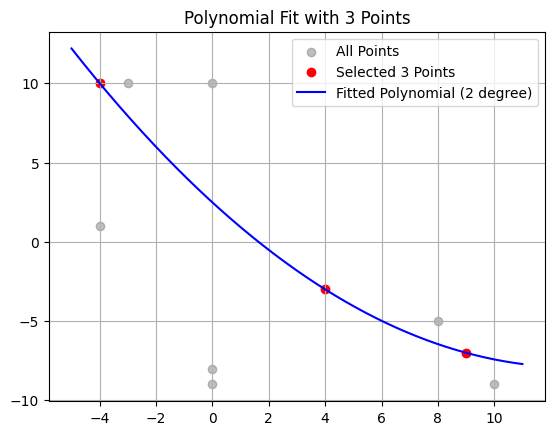


Fitting Polynomial with 4 points:
Coefficients: [-0.07280983  0.71875    -0.46004274 -8.        ]


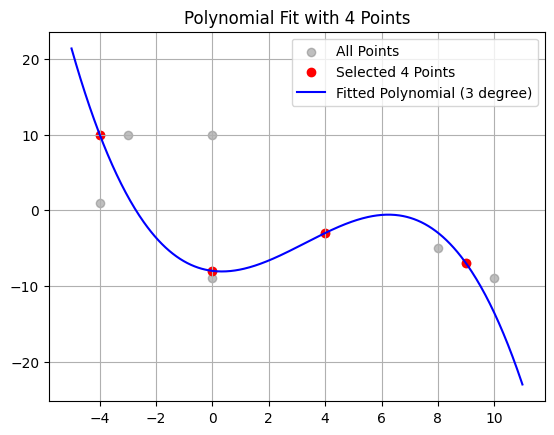


Fitting Polynomial with 5 points:
Coefficients: [-0.03248118  0.21952076  1.23844882 -5.13733211 -8.        ]


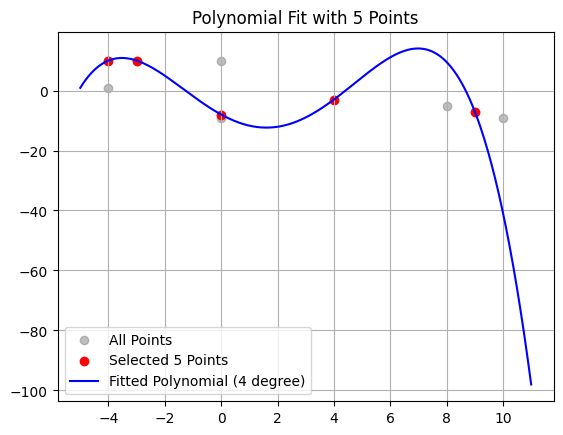


Fitting Polynomial with 6 points:
Coefficients: [ 2.91386854e-03 -4.99643875e-02  9.42244098e-02  1.51818020e+00
 -3.87854090e+00 -8.00000000e+00]


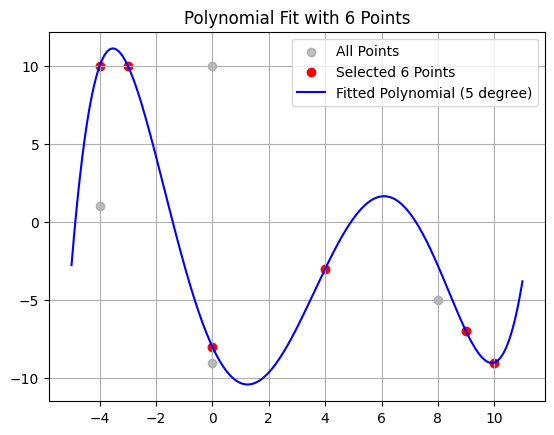


Fitting Polynomial with 7 points:


LinAlgError: Singular matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Points
def generate_points(num_points):
    np.random.seed(42)  # Set a seed for reproducibility
    # generate only integer numbers

    x = np.random.randint(-10, 11, size=num_points)
    y = np.random.randint(-10, 11, size=num_points)
    return x, y

# Step 2: Solve for Polynomial Coefficients
def fit_polynomial(x, y):
    n = len(x)
    A = np.vander(x, n, increasing=True)  # Vandermonde matrix
    coeffs = np.linalg.solve(A, y)       # Solve linear system
    return coeffs

# Step 3: Evaluate Polynomial
def evaluate_polynomial(coeffs, x):
    return np.polyval(coeffs[::-1], x)  # Evaluate polynomial using coefficients

# Step 4: Iteratively Fit and Plot
def iterative_polynomial_fitting(x, y):
    for i in range(2, len(x) + 1):  # Start with 2 points up to all points
        print(f"\nFitting Polynomial with {i} points:")
        x_subset = x[:i]
        y_subset = y[:i]
        coeffs = fit_polynomial(x_subset, y_subset)
        print(f"Coefficients: {coeffs[::-1]}")  # Reverse for traditional polynomial order

        # Plot the current polynomial
        plot_polynomial(x, y, x_subset, y_subset, coeffs, i)

# Step 5: Plot
def plot_polynomial(x_all, y_all, x_subset, y_subset, coeffs, num_points):
    x_range = np.linspace(min(x_all) - 1, max(x_all) + 1, 500)
    y_range = evaluate_polynomial(coeffs, x_range)

    plt.scatter(x_all, y_all, color='gray', alpha=0.5, label='All Points')
    plt.scatter(x_subset, y_subset, color='red', label=f'Selected {num_points} Points')
    plt.plot(x_range, y_range, color='blue', label=f'Fitted Polynomial ({num_points-1} degree)')
    plt.title(f'Polynomial Fit with {num_points} Points')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main
num_points = 10  # Total number of points
# generate the points only with integer values

x, y = generate_points(num_points)
print(f"Original Points (x, y): {list(zip(x, y))}")
iterative_polynomial_fitting(x, y)


In [ ]:
# give me the co-effs for the 3rd degree polynomial passing through points (-4,10),(9,-7),(4,-3) and (0,-8)

import numpy as np
x_points = np.array([-4, 9, 4, 0, -3])
y_points = np.array([10, 7, -3, -8, 10])
coefficients = np.polyfit(x_points, y_points, 4)  # 3 for a 3rd-degree polynomial
print("Coefficients:", coefficients)


Coefficients: [-0.03048687  0.22550366  1.20653999 -5.23305861 -8.        ]


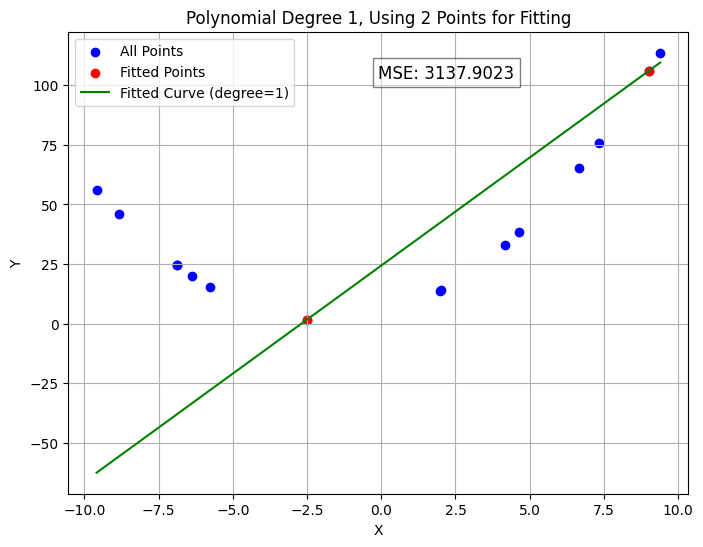

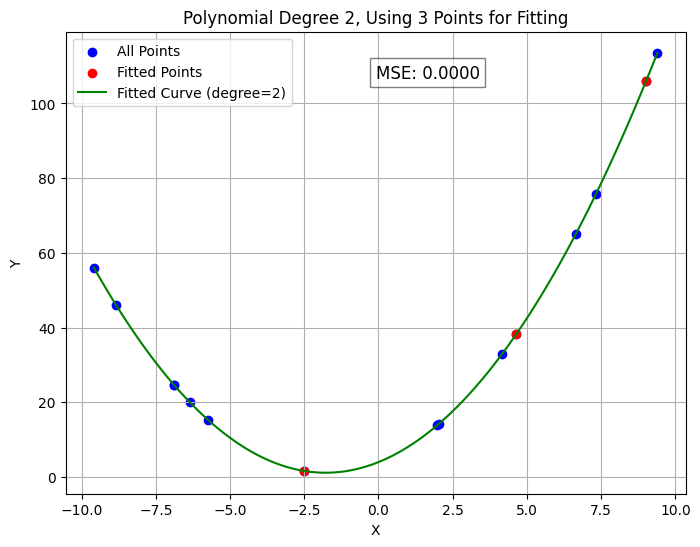

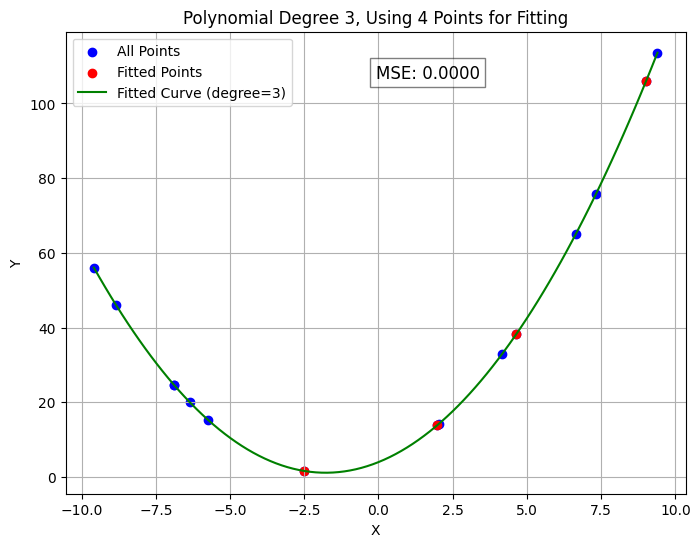

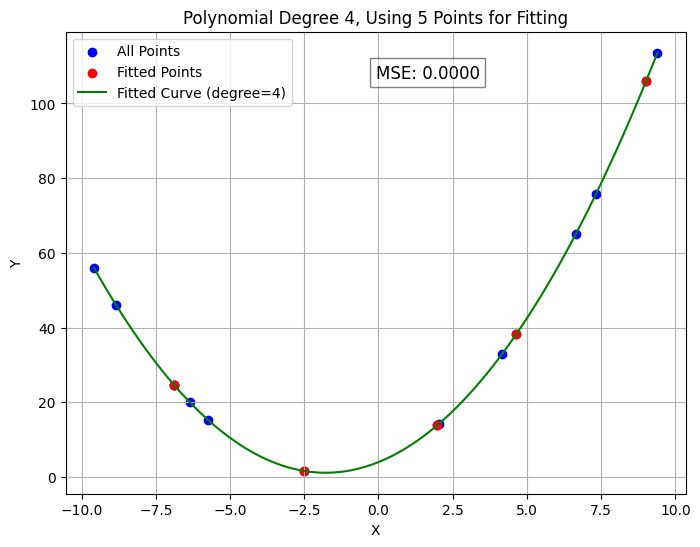

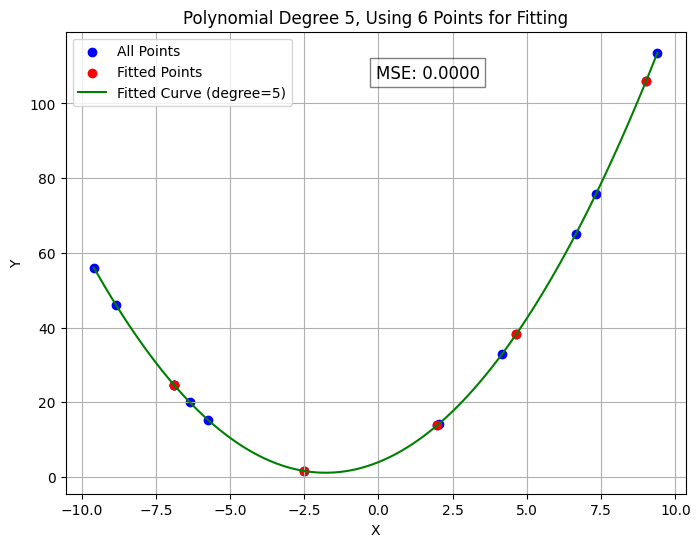

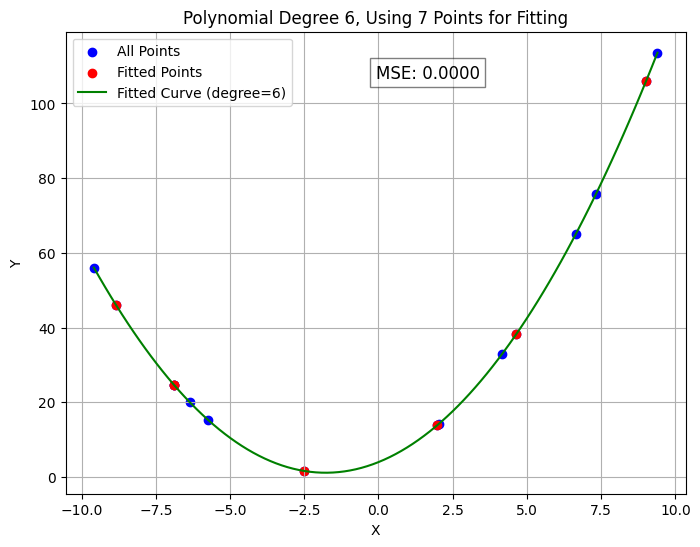

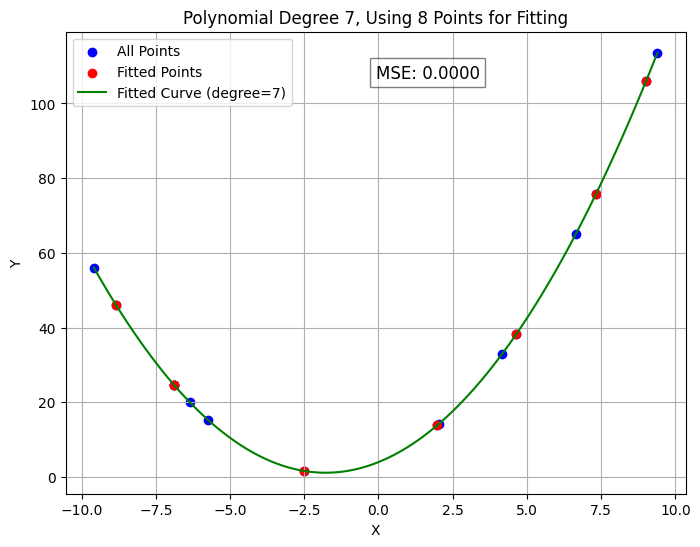

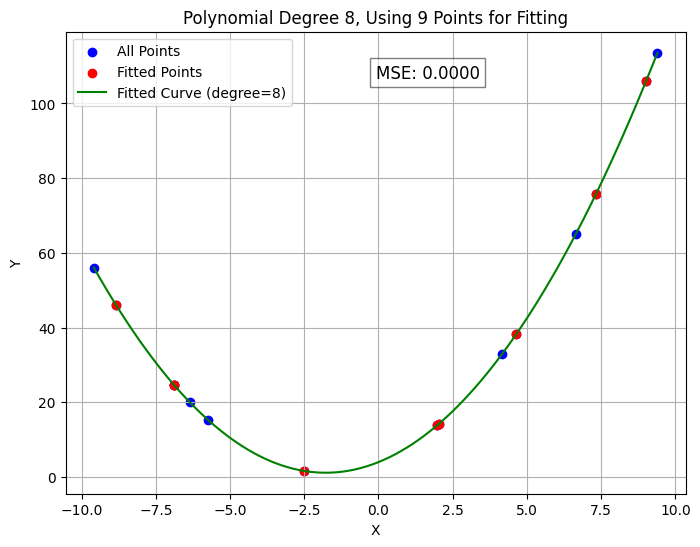

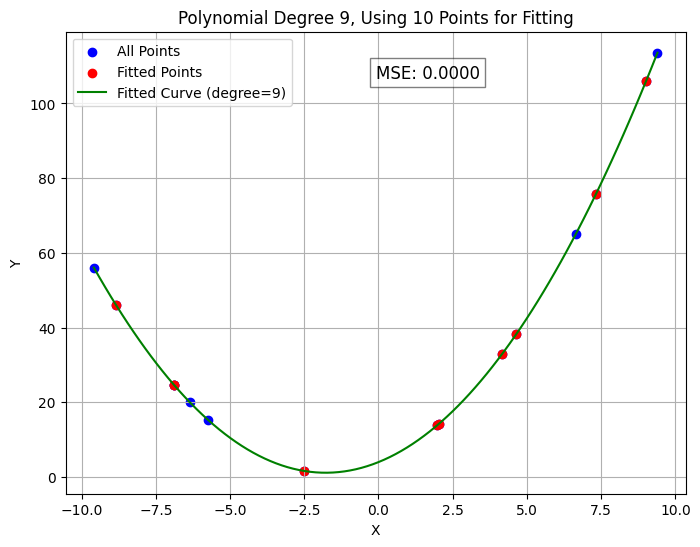

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

# Sample 15 random points from the X-Y plane
np.random.seed(42)  # For reproducibility
x = np.random.uniform(-10, 10, 15)
y = 0.9*(x**2) + 3.2*x + 4 #+ np.random.normal(0, 2, 15)
#y = np.random.uniform(-10, 10, 15)

mse_list = []

# Loop through polynomial degrees and plot
for j in range(2, 11):
    # Select j points for fitting
    fit_x = x[:j]
    fit_y = y[:j]

    # Fit a polynomial of degree j-1
    coefs = np.polyfit(fit_x, fit_y, deg=j-1)
    poly = np.poly1d(coefs)

    # Calculate MSE on the remaining points
    remaining_x = x[j:]
    remaining_y = y[j:]
    if len(remaining_x) > 0:
        predicted_y = poly(remaining_x)
        mse = mean_squared_error(remaining_y, predicted_y)
        mse_list.append(mse)
    else:
        mse = 0.0  # If no remaining points, no error

    # Generate points for plotting the fitted curve
    x_curve = np.linspace(min(x), max(x), 100)
    y_curve = poly(x_curve)

    # Plot the points and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color="blue", label="All Points")
    plt.scatter(fit_x, fit_y, color="red", label="Fitted Points")
    plt.plot(x_curve, y_curve, color="green", label=f"Fitted Curve (degree={j-1})")

    # Annotate MSE
    plt.text(0.5, 0.9, f"MSE: {mse:.4f}", transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Add labels and legend
    plt.title(f"Polynomial Degree {j-1}, Using {j} Points for Fitting")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)

    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2] # all rows and first 2 cols
y = (iris.target == 0).astype(int) # compare and get the Y for binary classification

In [ ]:
class Perceptron:
  def __init__(self,lr=0.01,epochs=50):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples , n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for epoch in range(self.epochs):
      for idx,x_i in enumerate(X):
        # Prediction
        linear_output = np.dot(x_i,self.weights) + self.bias
        y_pred = 1 if linear_output >=0 else 0

        # Updation of weights
        update = self.lr * (y[idx] - y_pred) # in this specific case - Gradient and Error both are same
        self.weights += update*x_i
        self.bias += update

      if epoch % 10 == 0:
        self.plot_decision_boundary(X,y,epoch)

  def predict(self,X):
    linear_output = np.dot(X,self.weights) + self.bias
    return np.where(linear_output >=0,1,0)

  def plot_decision_boundary(self,X,y,epoch):

    if self.weights[1] == 0:
      return # avoiding the division by 0 in line 39

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',alpha=0.7)
    x_vals = np.linspace(X[:,0].min(),X[:,0].max(),100)
    y_vals = -(self.weights[0] * x_vals + self.bias) / self.weights[1]
    plt.plot(x_vals,y_vals,'k')
    plt.title(f"Perceptron algo - epoch -> {epoch+1}")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Weidth")

    plt.show()



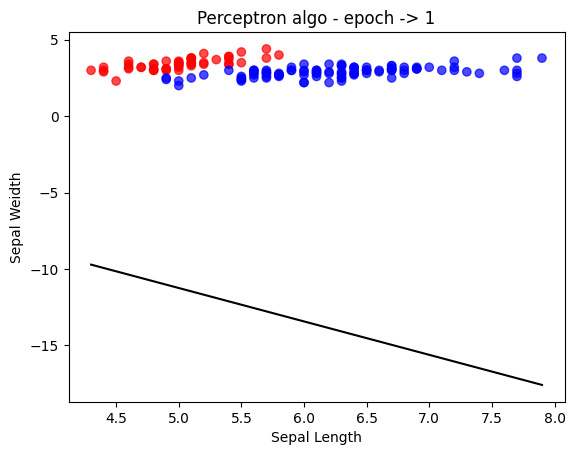

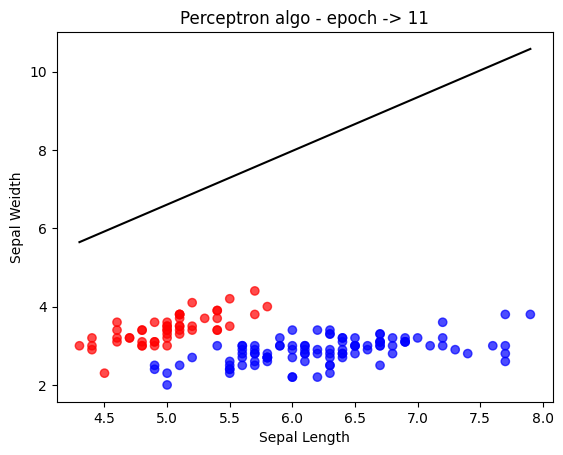

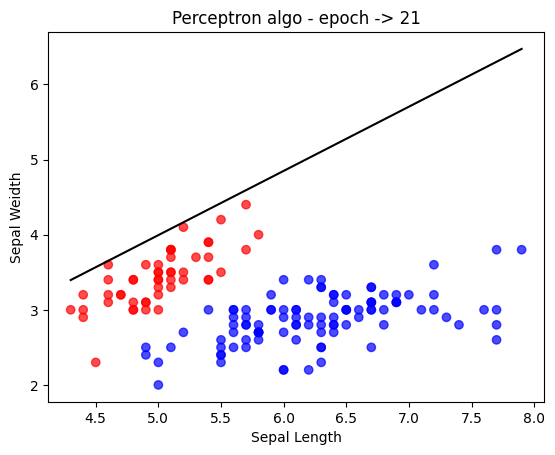

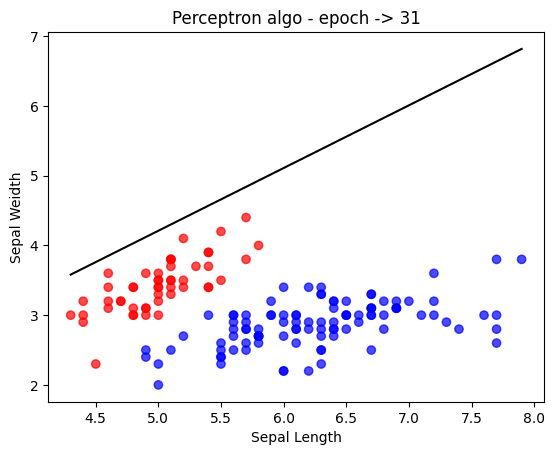

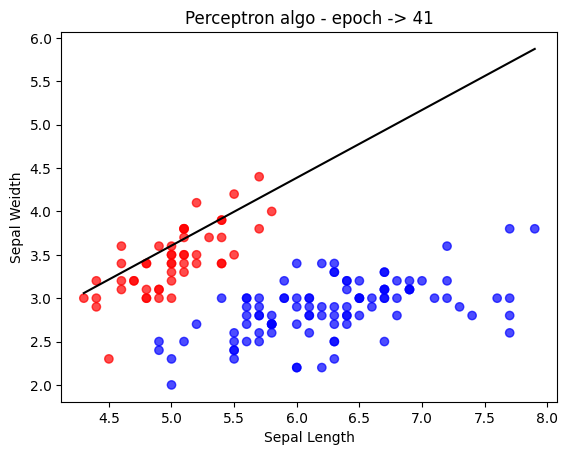

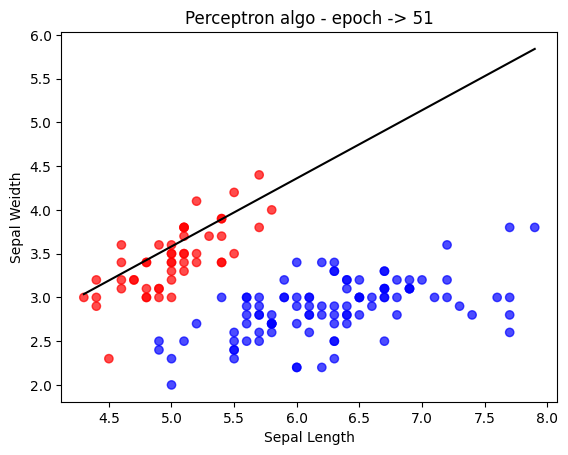

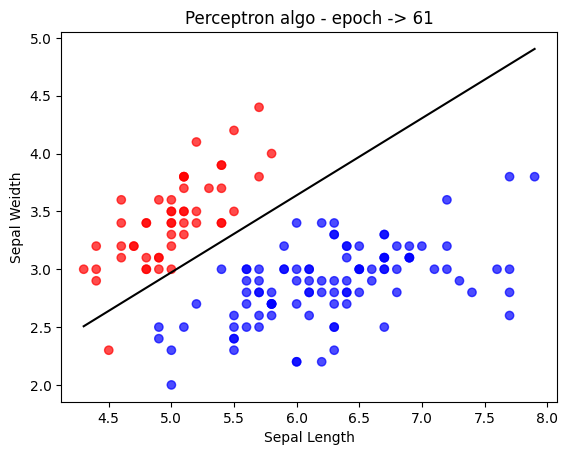

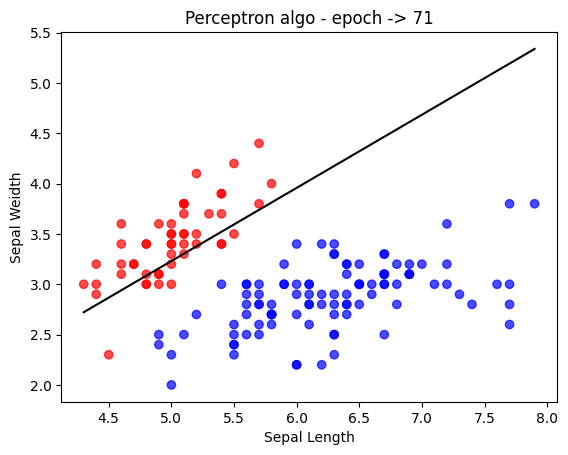

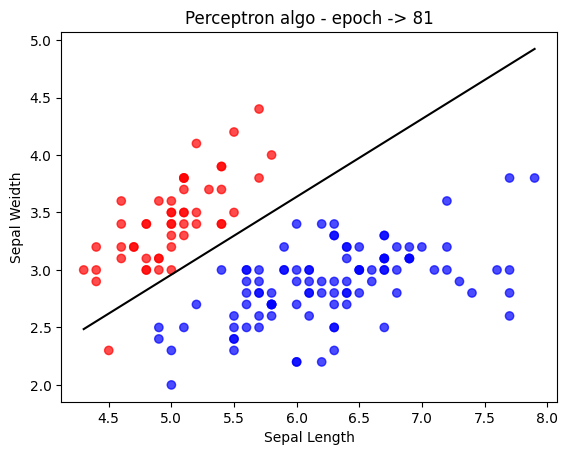

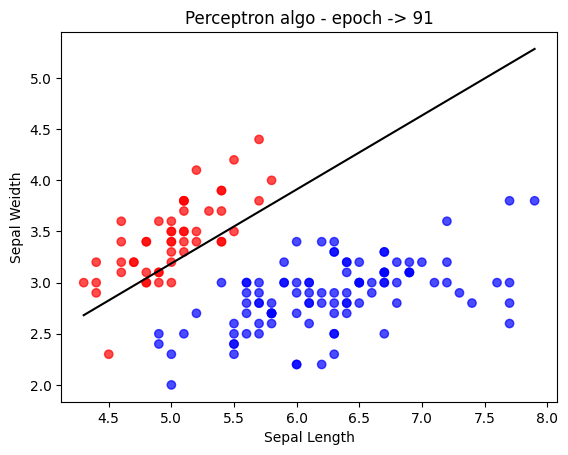

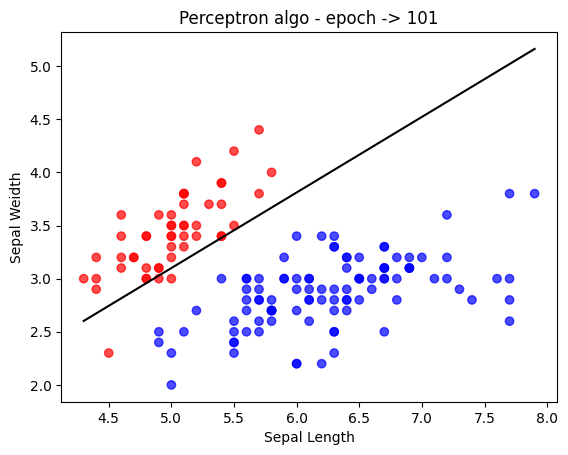

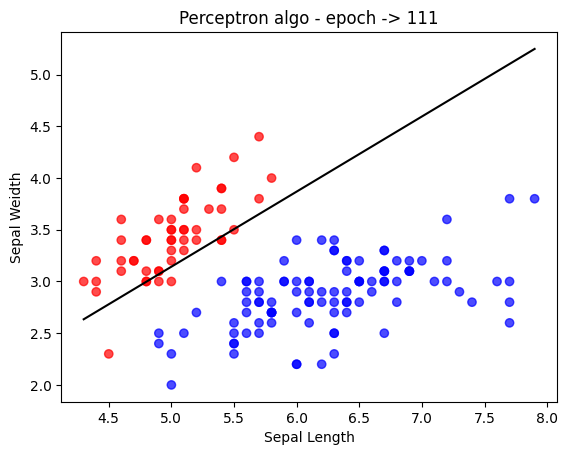

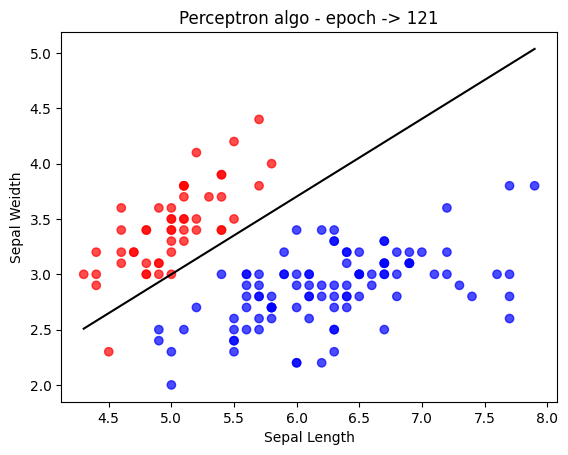

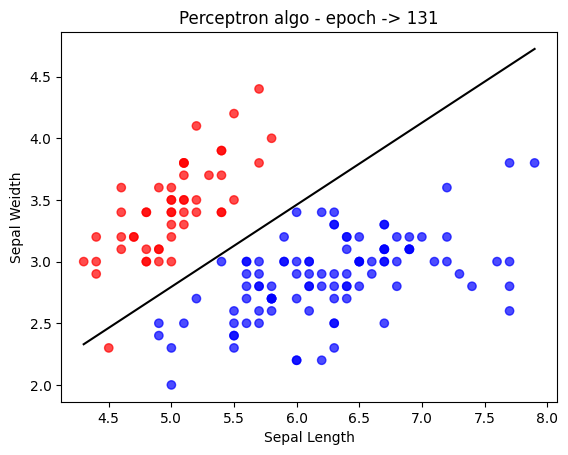

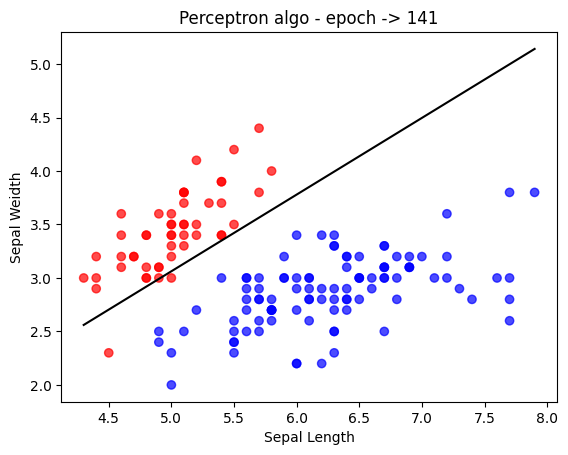

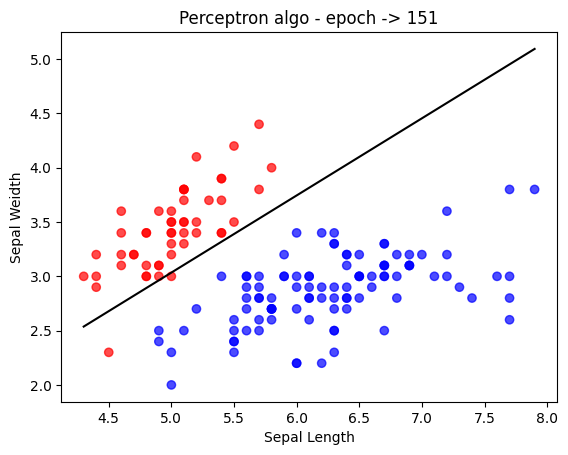

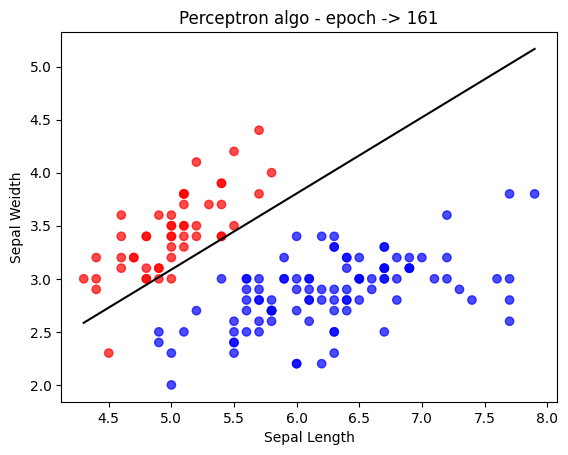

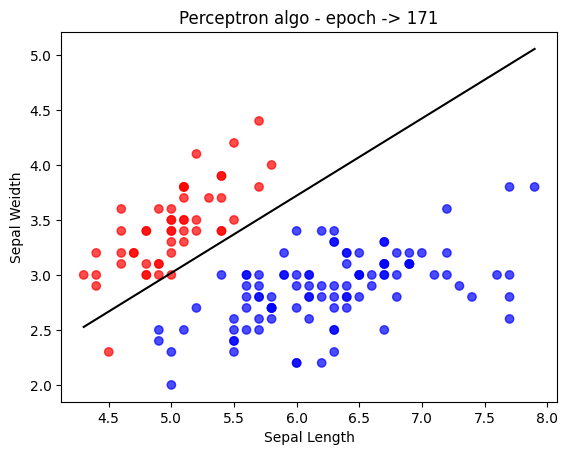

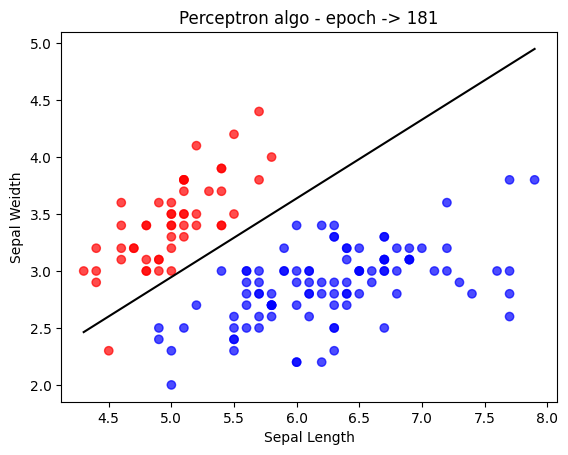

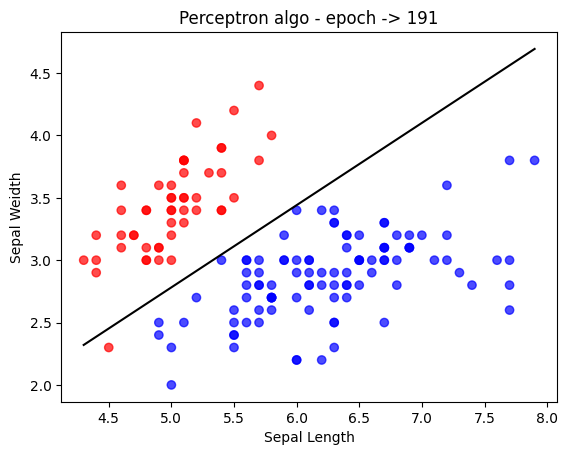

In [ ]:
preceptron = Perceptron(0.01,200)
preceptron.fit(X,y)

In [ ]:
def compute_metrics(y_true, y_pred):
  tp = sum((y_true == 1) & (y_pred == 1))
  tn = sum((y_true == 0) & (y_pred == 0))
  fp = sum((y_true == 0) & (y_pred == 1))
  fn = sum((y_true == 1) & (y_pred == 0))
  acc = np.mean(y_true == y)

  precision = tp / (tp+fp)
  recall = tp /(tp+fn)
  f1_score = 2* (precision*recall) / (precision+recall)

  return precision,recall,f1_score,acc

y_pred = preceptron.predict(X)

precision,recall,f1_score,acc = compute_metrics(y,y_pred)

print(f"Precision -> {precision}, Recall -> {recall}, F1-Score -> {f1_score} , acc -> {acc}")


Precision -> 1.0, Recall -> 0.98, F1-Score -> 0.98989898989899 , acc -> 1.0
